In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

In [22]:
train = pd.read_csv('logistic_digits_train.txt')
test = pd.read_csv('logistic_digits_test.txt')
#Now, we remove spaces present within column names for easier analysis
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')

In [23]:
#probs = np.array([[[124765]]])
#print(probs)
#n = probs.shape[0]
#probs.squeeze(-1)

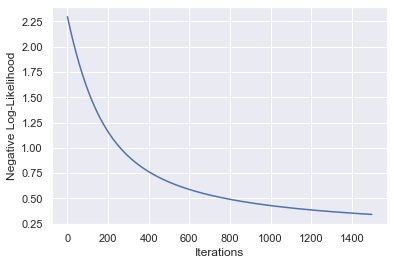

In [24]:
import numpy as np
import seaborn as sns
#from data import df_train
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

def softmax(logits: np.ndarray, n_cls: int):


    probs = np.array([np.empty([n_cls]) for i in range(logits.shape[0])])

    for i in range(logits.shape[0]):
        exp = np.exp(logits[i])
        denom = np.sum(exp)

        # logit scores to probability values
        probs[i] = exp / denom

    return probs


def linearPredict(X: np.ndarray, W: np.ndarray, biases: np.ndarray, n_cls: int):

    logits = W.dot(X.T).T

    return logits


def cross_entropy(probs: np.ndarray, y: np.ndarray, W:np.ndarray) -> float:

    n = probs.shape[0]

    L2 = np.sum(W ** 2 / (2*n))

    axis0 = np.arange(n)

    CELoss = -np.log(probs[axis0, y.squeeze(-1)]).sum() + L2

    return CELoss / n


def gd(X: np.ndarray, y: np.ndarray, W: np.ndarray,
       biases: np.ndarray, lr: float, n_cls: int,
       iterations: int) -> (np.ndarray, np.ndarray, np.ndarray):

    n = len(y)

    L2 = np.sum(1 / n * W)


    axis0 = np.arange(X.shape[0])

    cost_history = np.zeros(iterations)

    for it in range(iterations):

        logitScores = linearPredict(X, W, biases, n_cls)
        probs = softmax(logitScores, n_cls)

        # error
        cost_history[it] = cross_entropy(probs, y, W)

        # compute error for probability of correct outcome
        probs[axis0, y.squeeze(-1)] -= 1

        # gradient of weights and biases
        gradsW = probs.T.dot(X) + L2
        gradsBiases = np.sum(probs, axis=0).reshape(-1, 1)

        # update weights
        W -= (lr * gradsW)

        # update biases
        biases -= (lr * gradsBiases)

    return W, biases, cost_history

### train
n_cls = 10
n_feats = train.shape[1] - 1
lr = 0.01
iterations = 1500

#  weight matrix
W = np.random.rand(n_cls, n_feats)
biases = np.random.rand(n_cls, 1)

# feature and label vectors
X = train.loc[:, :'X_train_65'].to_numpy()
y = train.loc[:, 'Var2'].to_numpy().reshape(-1, 1)

# normalize images
X = X / 255.

W, biases, costs = gd(X, y, W, biases, lr, n_cls, iterations)

# plot log likelihood as a function of the number of iterations
x = np.arange(iterations)

ax = sns.lineplot(x=x, y=costs, palette=['red'])
sns.color_palette()
#ax.set_palette("Reds")
#ax.set_title("")
ax.set_xlabel("Iterations")
ax.set_ylabel("Negative Log-Likelihood")
plt.show()

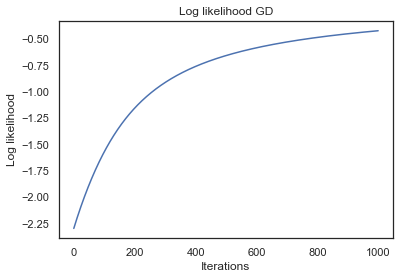

In [17]:

#logit_matrix must be np.ndarray input
#column_num must be an integer value
#This function takes in each row of a logit score matrix in training data and returns a probability distribution
#over output classes

#The input variables train, weights, and biases need to be arrays. column_num must be an integer value
#This function calculates logit scores for the training data
def logit(train, weights, biases):
    logit_scores = (weights.dot(train.T).T) #+biases
    #print(weights.shape)
    #print(train.shape)
    return logit_scores


def softmax(logit_matrix, output_nums):

    prob_dist = np.array([np.empty([output_nums]) for i in range(len(logit_matrix))])
    for i in range(len(logit_matrix)):
        #Normalizing each value to avoid numerical instability
        logit_matrix[i] -= np.max(logit_matrix)
        x = np.exp(logit_matrix[i])
        prob_dist[i] = x/(np.sum(x))

    return prob_dist
        


#This function should only have array inputs
#Inputs are probabilities, ground truth classes, and weights
def cross_entropy(probabilities, gt_classes, weights):

    prob_length = len(probabilities)
    #L2 = weights ** 2 / prob_length
    cross_entropy.log_likelihood = np.log(probabilities[np.arange(prob_length), gt_classes.squeeze(-1)])
    loss = cross_entropy.log_likelihood.sum() #+ L2
    averaged_loss = loss/prob_length
    return averaged_loss




#The first four inputs must be arrays. Step size must be float, output nums must be int, iterations must be int.
def gd(training, gt_classes, weights,
       biases, step_size, output_nums,
       iterations):

    n = len(gt_classes)

    L2 = 2 / n * weights

    axis0 = np.arange(len(training))

    cost_history = np.zeros(iterations)

    for x in range(iterations):

        logitScores = logit(training, weights, biases)
        probs = softmax(logitScores, output_nums)

        # error
        cost_history[x] = cross_entropy(probs, gt_classes, weights)

        # probability error
        probs[axis0, gt_classes.squeeze(-1)] -= 1

        # gradient of weights and biases
        a = probs.T
        weight_grad = a.dot(training) #+ L2
        bias_grad = np.sum(probs, axis=0)
        bias_grad = bias_grad.reshape(-1,1)

        # update weights
        weights = weights - (step_size * weight_grad)

        # update biases
        biases = biases - (step_size * bias_grad)

    return weights, biases, cost_history

### train
output_classes = 10
features = len(train.columns) - 1
step_size = 0.01
iterations = 1000

#  weight matrix
W = np.random.rand(output_classes, features)
biases = np.random.rand(output_classes, 1)

# feature and label vectors
X = train.loc[:, :'X_train_65'].to_numpy()
y = train.loc[:, 'Var2'].to_numpy().reshape(-1, 1)

# normalize images
X = X / 255.

weights, biases, costs = gd(X, y, W, biases, step_size, output_classes, iterations)

# plot log likelihood as a function of the number of iterations
x = np.arange(iterations)

ax = sns.lineplot(x=x, y=costs)

ax.set_title("Log likelihood GD")
ax.set_xlabel("Iterations")
ax.set_ylabel("Log likelihood")
plt.show()

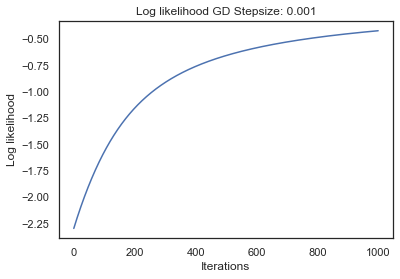

In [18]:
# plot log likelihood as a function of the number of iterations
x = np.arange(iterations)

ax = sns.lineplot(x=x, y=costs)

ax.set_title("Log likelihood GD Stepsize: 0.001")
ax.set_xlabel("Iterations")
ax.set_ylabel("Log likelihood")
plt.show()

In [7]:
#log_likelihood

In [8]:
#cumsum = np.cumsum(log_likelihood)

In [9]:
#cumsum.min()

In [10]:
#cumsum

In [25]:
def predict(x_test, W, y, biases, n_cls):
    logit_scores = linearPredict(x_test, W, biases, n_cls)
    probs = softmax(logit_scores, n_cls)
    
    y_hat = np.argmax(probs, axis = 1).reshape(-1,1)
    accuracy = (y_hat == y).sum() / len(y) * 100
    
    return accuracy

# feature and label vectors
X_test = test.loc[:, :'X_test_65'].to_numpy()
y_test = test.loc[:, 'Var2'].to_numpy().reshape(-1, 1)

n_cls = 10
X_test = X_test / 255

acc = predict(X_test, weights, y_test, biases, n_cls)

print(f"Digits accuracy: {acc:.2f}%")




Digits accuracy: 93.66%


In [ ]:
100-acc